In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [4]:
yes_no = {'Yes':True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no) 
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no) 
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some col

In [5]:
star_wars['Unnamed: 4']

1       Star Wars: Episode II  Attack of the Clones
2                                               NaN
3       Star Wars: Episode II  Attack of the Clones
4       Star Wars: Episode II  Attack of the Clones
5       Star Wars: Episode II  Attack of the Clones
6       Star Wars: Episode II  Attack of the Clones
7       Star Wars: Episode II  Attack of the Clones
8       Star Wars: Episode II  Attack of the Clones
9       Star Wars: Episode II  Attack of the Clones
10      Star Wars: Episode II  Attack of the Clones
11                                              NaN
12                                              NaN
13      Star Wars: Episode II  Attack of the Clones
14      Star Wars: Episode II  Attack of the Clones
15      Star Wars: Episode II  Attack of the Clones
16      Star Wars: Episode II  Attack of the Clones
17                                              NaN
18      Star Wars: Episode II  Attack of the Clones
19      Star Wars: Episode II  Attack of the Clones
20      Star

In [6]:
dictionary = {"Star Wars: Episode I  The Phantom Menace": True, "Star Wars: Episode II  Attack of the Clones": True, "Star Wars: Episode III  Revenge of the Sith": True, "Star Wars: Episode IV  A New Hope": True, "Star Wars: Episode V The Empire Strikes Back": True, "Star Wars: Episode VI Return of the Jedi": True, np.nan:False}
ep_num = 1
for i in star_wars.columns[3:9]:
    star_wars[i] = star_wars[i].map(dictionary)
    star_wars = star_wars.rename(columns = {i:"seen_"+ str(ep_num)})
    ep_num += 1
    
    
    

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [8]:
dictionary = {}
dictionary_index = 1
for i in star_wars.columns[9:15]:
    dictionary[i] = "ranking" + str(dictionary_index)
    dictionary_index += 1

star_wars = star_wars.rename(columns = dictionary)

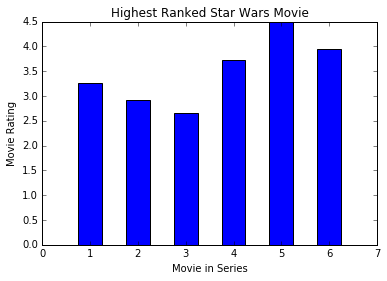

In [9]:
fig, ax = plt.subplots()
bar_heights = (7-star_wars.mean()[9:15])
bar_positions = np.arange(6) + 0.75
width = 0.5

plot = ax.bar(bar_positions, bar_heights, width)
ax.set_ylabel('Movie Rating')
ax.set_xlabel('Movie in Series')
ax.set_title('Highest Ranked Star Wars Movie')
plt.show()

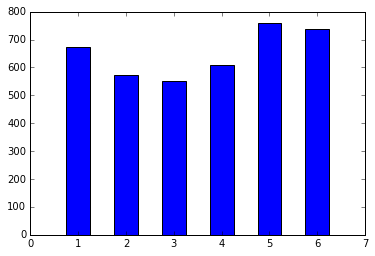

In [10]:
bar_heights = star_wars[star_wars.columns[3:9]].sum()
bar_positions = np.arange(6) + 0.75
width = 0.5

fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width)
plt.show()

I think, given the popularity rankings for each film, that the most popular films also tend to be the most viewed in the series. More people have seen The Phantom Menace than A New Hope, which makes sense given the fact that The Phantom Menace came out after the prequels had already been out for many years, giving it substantial hype. In addition, The New Hope was the first Star Wars film EVER so it might not have caught on until The Empire Strikes Back.

In [11]:
star_wars_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]

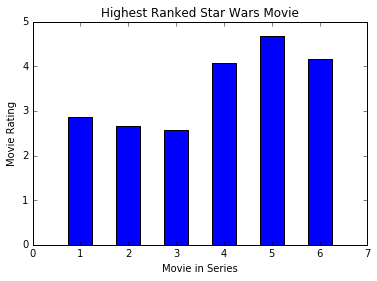

In [12]:
fig, ax = plt.subplots()
bar_heights = (7-star_wars_fans.mean()[9:15])
bar_positions = np.arange(6) + 0.75
width = 0.5

plot = ax.bar(bar_positions, bar_heights, width)
ax.set_ylabel('Movie Rating')
ax.set_xlabel('Movie in Series')
ax.set_title('Highest Ranked Star Wars Movie')
plt.show()

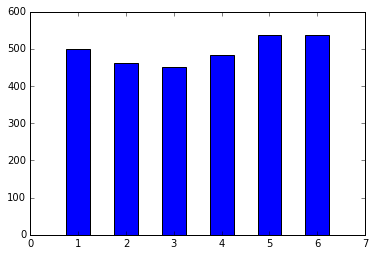

In [13]:
bar_heights = star_wars[star_wars.columns[3:9]].sum()
bar_positions = np.arange(6) + 0.75
width = 0.5

fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width)
plt.show()

People who identified as fans tend to rank the prequels higher than the sequels, and within the sequels, The Empire Strikes Back is the highest rated.

In [14]:
star_wars_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

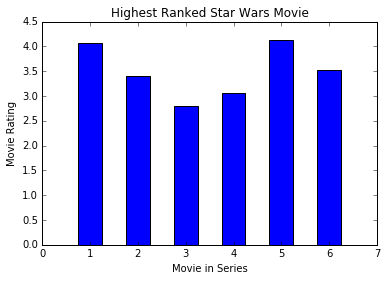

In [15]:
fig, ax = plt.subplots()
bar_heights = (7-star_wars_fans.mean()[9:15])
bar_positions = np.arange(6) + 0.75
width = 0.5

plot = ax.bar(bar_positions, bar_heights, width)
ax.set_ylabel('Movie Rating')
ax.set_xlabel('Movie in Series')
ax.set_title('Highest Ranked Star Wars Movie')
plt.show()

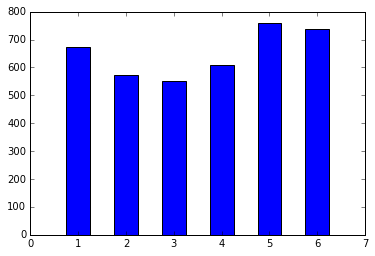

In [16]:
bar_heights = star_wars[star_wars.columns[3:9]].sum()
bar_positions = np.arange(6) + 0.75
width = 0.5

fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width)
plt.show()

The first three albums are rated much higher by fans who aren't necessarily fans of the series than fans who are. In additio